# <center>Network Science</center>

## <center>Home Assignment #1: Power law</center>

### <center>Student: Tetin Evgeniy</center>

## Problems

### Task 1.

Load [wordcounts](http://www.leonidzhukov.net/hse/2015/networks/data/wordcounts.txt) dataset. 
1. Check that Zipf's Law holds
2. Assuming that the data is distributed according to the Power Law, find
 * $\alpha$ of the distribution
 * mean sample variance $\sigma^2$
3. Produce summary of the frequencies: min, max, mean, median

In [1]:
%matplotlib inline
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
# Loading the dataset
dataset = np.loadtxt("wordcounts.txt", dtype="i8,a16")

# Making sure it is sorted (descending by the first field)
dataset[::-1].sort()

# Creating a list of word counts
wordcount = list(x[0] for x in dataset)

<b>1. Check that Zipf's Law holds</b>

Zipf's Law claims that the frequency of a word is inversely proportional to its rank in the frequency table.

To show that it is true in our case, let's plot the word ranks with regard to the word counts. Since our data is sorted already, a word's rank is just its number in the array (starting with 1).

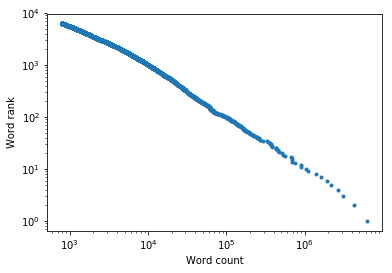

In [3]:
# Plotting data in log-log scale
plt.loglog(wordcount, np.arange(1, len(wordcount)+1), '.')
plt.xlabel('Word count')
plt.ylabel('Word rank')

We see that the visualization fits the Power law shape well and conclude that the word frequency is indeed inversely proportional to the word rank.

<b>2. Assuming that the data is distributed according to the Power Law, find
 * $\alpha$ of the distribution
 * mean sample variance $\sigma^2$</b>

In [4]:
# Finding distribution parameters
n = len(dataset)
alpha = 1 + n/float(np.sum(np.log(np.array(wordcount)/float(min(wordcount)))))
sigma = (alpha - 1)/np.sqrt(n)

In [5]:
alpha

1.7194176300571233

In [6]:
np.square(sigma) # sigma squared

8.1918601841881599e-05

<b>3. Produce summary of the frequencies: min, max, mean, median</b>

In [7]:
min(wordcount) # min

800

In [8]:
max(wordcount) # max

6187267

In [9]:
np.mean(wordcount) # mean

13566.670781893004

In [10]:
np.median(wordcount) # median

2335.0

### <hr /> Task 2.

Find and plot PDF and CDF for the following networks:
* [Routing network](http://www.leonidzhukov.net/hse/2015/networks/data/network.txt)
* [Web graph](http://www.leonidzhukov.net/hse/2015/networks/data/web_Stanford.txt)

1. Are they correspondent to power law?
2. Find max and mean values of incoming and outcoming node degrees
3. Find $\alpha$ via Maximum Likelihood and calculate $\sigma^2$
4. Determine $x_{min}$ via Kolmogorov-Smirnov test
5. Try to fit Erdos model for the Web Graph and describe common and different points in their descriptive statistics

**Routing network**

In [11]:
# Loading the network
edges = np.loadtxt("network.txt", skiprows=4, dtype="i8,i8")

# Creating a graph
RN = nx.Graph()
RN.add_edges_from(edges)

# Obtaining the degree distribution
RN_degrees = RN.degree()
RN_degrees = np.array(RN_degrees.values())

* Find and plot PDF and CDF for the Routing network

In [13]:
# Function for the exponent of the power law distribution
def alpha(x, xmin):
    """Return the value of the power law distribution exponent"""
    return (1 + len(x)/float(np.sum(np.log(x/float(xmin)))))

In [14]:
# Function for the constant of the power law distribution
def constant(alpha, xmin):
    """Return the constant of the power law distribution"""
    return (alpha - 1)*np.power(xmin, alpha - 1)

In [15]:
# Finding the parameters of the degree distribution

RN_alpha = alpha(RN_degrees, np.min(RN_degrees)) # compute alpha
RN_c = constant(RN_alpha, np.min(RN_degrees))    # compute c

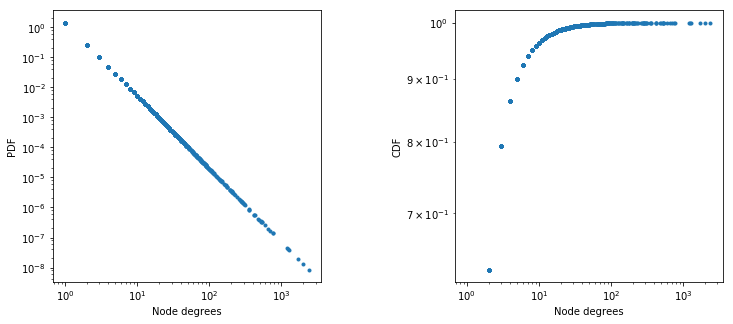

In [30]:
# Plotting PDF and CDF of the distribution (in log-log scale)

plt.figure(1, figsize = (12, 5))
plt.subplots_adjust(wspace = 0.5)

plt.subplot(121)
plt.loglog(RN_degrees, RN_c/np.power(RN_degrees, RN_alpha), '.')
plt.xlabel('Node degrees')
plt.ylabel('PDF')

plt.subplot(122)
plt.loglog(RN_degrees, 1 - np.power(RN_degrees/float(min(RN_degrees)), 1 - RN_alpha), '.')
plt.xlabel('Node degrees')
plt.ylabel('CDF')

* Is it correspondent to power law?

Judging by the obtained visualization, we can conclude that the distribution of node degrees of the Routing network fits Power law model very well.

* Find max and mean values of incoming and outcoming node degrees

Although the graph representing the Routing network is described in the text file as undirected, let's assume the given edges as directed, thus making it possible to define incoming and outcoming degrees for the nodes.

In [17]:
# Creating a directed graph

RN_directed = nx.DiGraph()
RN_directed.add_edges_from(edges)

print '  max in-degree: {0:d}'.format(     max(RN_directed.in_degree().values()))
print ' mean in-degree: {0:f}'.format( np.mean(RN_directed.in_degree().values()))
print ' max out-degree: {0:d}'.format(    max(RN_directed.out_degree().values()))
print 'mean out-degree: {0:f}'.format(np.mean(RN_directed.out_degree().values()))

  max in-degree: 40
 mean in-degree: 2.109306
 max out-degree: 2389
mean out-degree: 2.109306


* Find $\alpha$ via Maximum Likelihood and calculate $\sigma^2$

In [18]:
alpha(RN_degrees, min(RN_degrees)) # alpha

2.4351717529396106

In [19]:
RN_sigma = (RN_alpha - 1)/np.sqrt(len(RN_degrees)) # sigma
print np.square(RN_sigma) # sigma squared

8.96972503783e-05


**Web graph**

In [20]:
# Loading data
W_edges = np.loadtxt("web_Stanford.txt", skiprows=4, dtype="i8,i8")

In [21]:
# Creating a graph
W = nx.DiGraph()
W.add_edges_from(W_edges)

In [22]:
# Obtaining the degree distribution
W_degrees = W.degree()
W_degrees = np.array(W_degrees.values())

* Find and plot PDF and CDF for the Web graph

In [23]:
# Finding the parameters of the degree distribution

W_alpha = alpha(W_degrees, np.min(W_degrees)) # compute alpha
W_c  = constant(W_alpha,   np.min(W_degrees)) # compute c

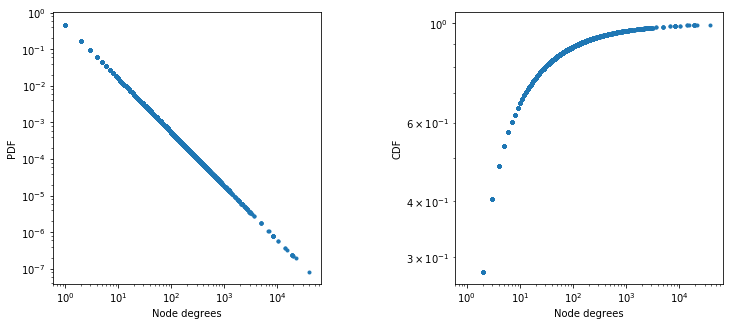

In [31]:
# Plotting PDF and CDF of the distribution (in log-log scale)

plt.figure(1, figsize = (12, 5))
plt.subplots_adjust(wspace = 0.5)

plt.subplot(121)
plt.loglog(W_degrees, W_c/np.power(W_degrees, W_alpha), '.')
plt.xlabel('Node degrees')
plt.ylabel('PDF')

plt.subplot(122)
plt.loglog(W_degrees, 1 - np.power(W_degrees/float(min(W_degrees)), 1 - W_alpha), '.')
plt.xlabel('Node degrees')
plt.ylabel('CDF')

* Is it correspondent to power law?

Once again, the visualization indicates that the distribution of node degrees of the Web graph indeed corresponds to the Power law model quite closely.

* Find max and mean values of incoming and outcoming node degrees

In [25]:
print '  max in-degree: {0:d}'.format(     max(W.in_degree().values()))
print ' mean in-degree: {0:f}'.format( np.mean(W.in_degree().values()))
print ' max out-degree: {0:d}'.format(    max(W.out_degree().values()))
print 'mean out-degree: {0:f}'.format(np.mean(W.out_degree().values()))

  max in-degree: 38606
 mean in-degree: 8.203166
 max out-degree: 255
mean out-degree: 8.203166


* Find $\alpha$ via Maximum Likelihood and calculate $\sigma^2$

In [26]:
alpha(W_degrees, min(W_degrees)) # alpha

1.4712387062630894

In [27]:
W_sigma = (W_alpha - 1)/np.sqrt(len(W_degrees)) # sigma
print np.square(W_sigma) # sigma squared

7.87738755106e-07
